In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv("data.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [2]:
%matplotlib inline

c:\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


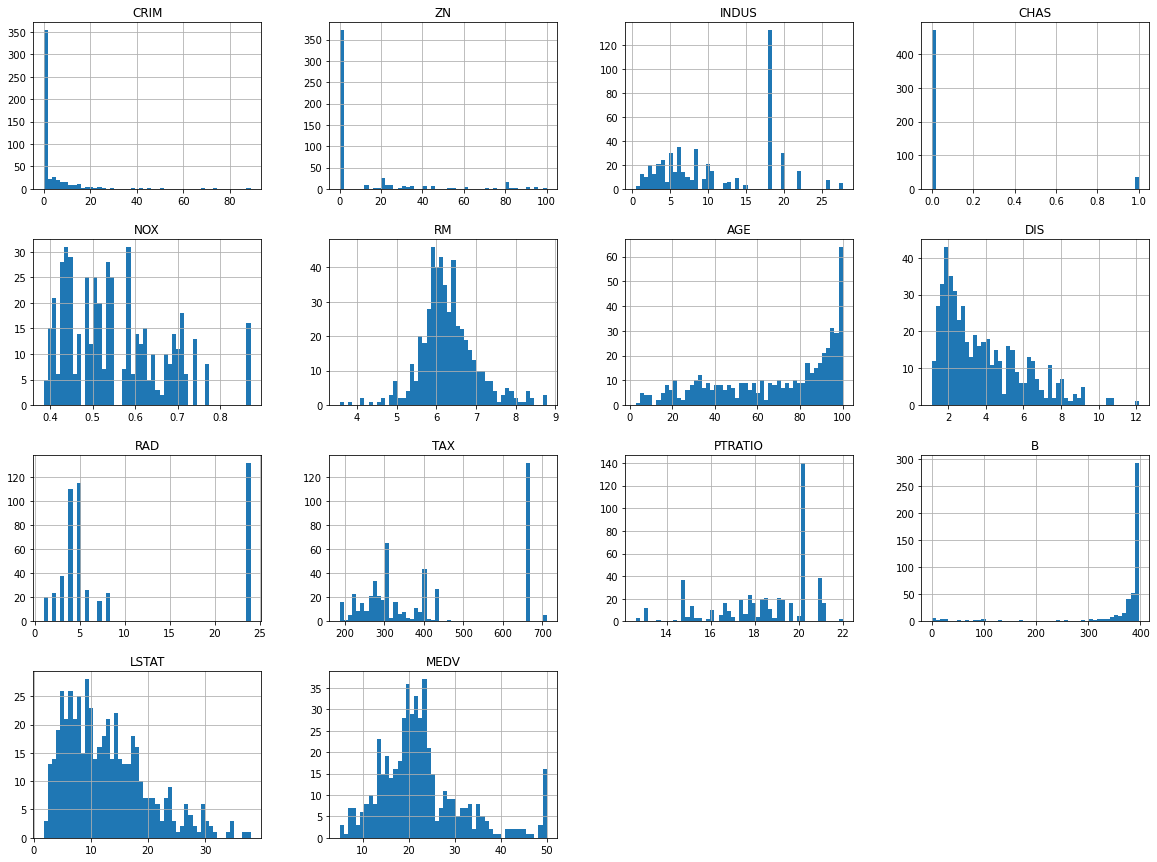

In [3]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [4]:
#train_set,test_set=split_train_test(df,0.2)


In [5]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(len(train_set,))
print(len(test_set))

404
102


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]


In [7]:
df=strat_train_set.copy()

In [8]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

c:\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

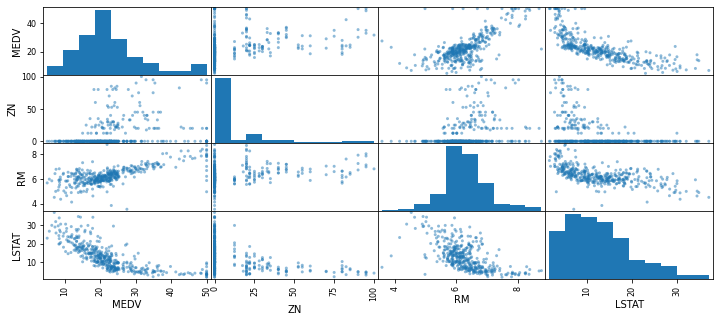

In [9]:
from pandas.plotting import scatter_matrix
attributes =  ['MEDV','ZN','RM','LSTAT']
scatter_matrix(df[attributes],figsize=(12,5))


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

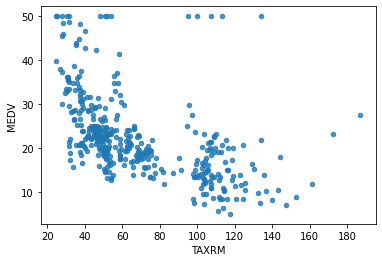

In [10]:
df['TAXRM']=df['TAX']/df['RM']
df.head()
df.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8)

In [11]:
df=strat_train_set.drop('MEDV',axis=1)
df_labels=strat_train_set['MEDV'].copy()

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [13]:
x=imputer.transform(df)
df_2=pd.DataFrame(df,columns=df.columns)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
                        ('imputer',SimpleImputer(strategy='median')),
                        ('std_scaler',StandardScaler()),
])

In [15]:
df_num_2=my_pipeline.fit_transform(df_2)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model = LinearRegression()
#model=DecisionTreeRegressor()
model.fit(df_num_2,df_labels)

RandomForestRegressor()

In [17]:
some_data=df.iloc[:5]
some_labels = df.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)


array([22.325, 25.499, 16.61 , 23.347, 23.549])

In [18]:
from sklearn.metrics import  mean_squared_error
df_predictions=model.predict(df_num_2)
mse=mean_squared_error(df_labels,df_predictions)
rmse=np.sqrt(mse)
rmse


1.2592846203104737

In [19]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,df_num_2,df_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([2.86735204, 2.90203375, 4.37464032, 2.51406977, 3.53209092,
       2.93335159, 4.60570717, 3.40789724, 3.34335802, 3.191099  ])

In [20]:
 def print_scores(scores):
  print('scored',scores)
  print('mean',scores.mean())
  print('standard seviation',scores.std())

In [21]:
print_scores(rmse_scores)

scored [2.86735204 2.90203375 4.37464032 2.51406977 3.53209092 2.93335159
 4.60570717 3.40789724 3.34335802 3.191099  ]
mean 3.3671599839641324
standard seviation 0.6317867154776806


In [22]:
from joblib import dump,load
dump(model,'projet.joblib')

['projet.joblib']

In [23]:
x_test=strat_test_set.drop('MEDV',axis=1)
y_test=strat_test_set['MEDV'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

2.9409264363328718

In [24]:
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.325])

In [25]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])